In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data=pd.read_csv(r"C:\Users\91938\Desktop\Top Mentor\Machine Learning\15th November\10. Random Forests\Company_Data.csv")
    print(data.head(2))
except Exception as e:
    print(e)

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  


In [3]:
df=data
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df['Sales'].value_counts()

Sales
7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: count, Length: 336, dtype: int64

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
#Converting sales into categorical value

In [9]:
median_sales = df['Sales'].median()

df['Sales_Category'] = np.where(
    df['Sales'] > median_sales, 'High', 'Low'
)
df['Sales_Category'].value_counts()

Sales_Category
Low     201
High    199
Name: count, dtype: int64

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


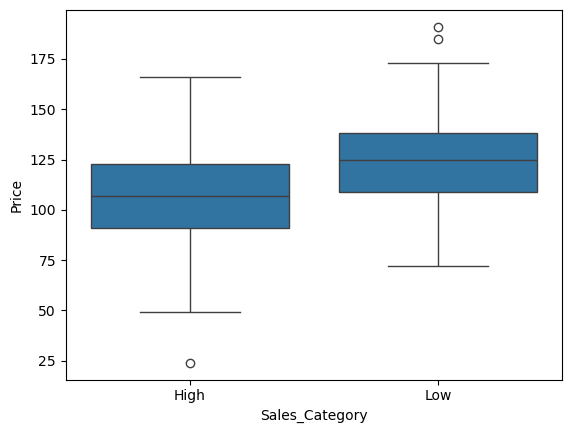

In [12]:
sns.boxplot(x='Sales_Category', y='Price', data=df)
plt.show()

In [13]:
#Lower prices tend to be associated with higher sales

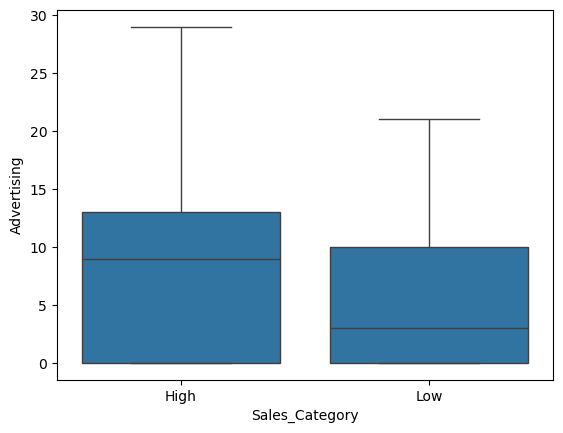

In [14]:
sns.boxplot(x='Sales_Category', y='Advertising', data=df)
plt.show()

In [15]:
#Higher advertising budgets lead to higher sales

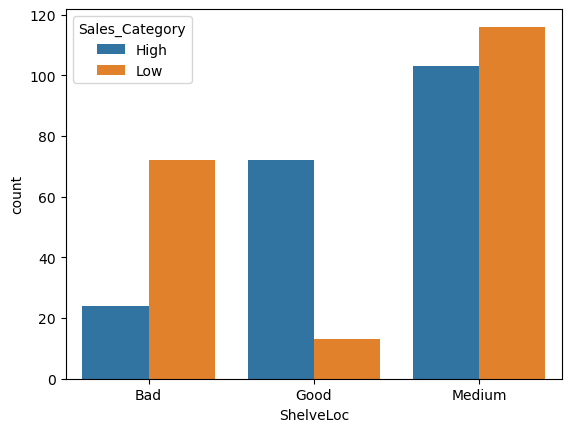

In [16]:
sns.countplot(x='ShelveLoc', hue='Sales_Category', data=df)
plt.show()

In [17]:
#Good shelf location → High sales

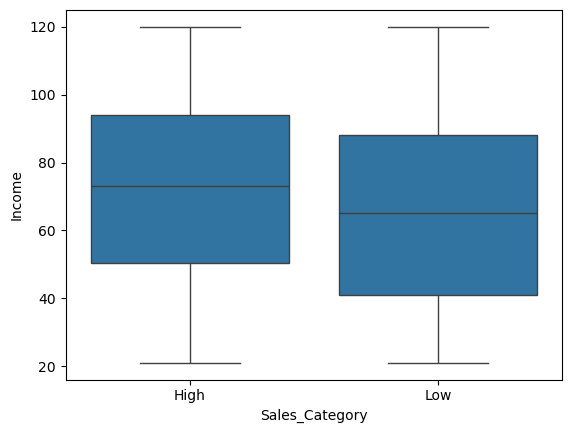

In [18]:
sns.boxplot(x='Sales_Category', y='Income', data=df)
plt.show()

In [19]:
#High-income regions generally have higher sales

In [20]:
df.drop('Sales', axis=1, inplace=True)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [21]:
df_encoded = pd.get_dummies(
    df,
    columns=['ShelveLoc', 'Urban', 'US'],
    drop_first=True
)
df_encoded

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Category,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,High,False,False,True,True
1,111,48,16,260,83,65,10,High,True,False,True,True
2,113,35,10,269,80,59,12,High,False,True,True,True
3,117,100,4,466,97,55,14,Low,False,True,True,True
4,141,64,3,340,128,38,13,Low,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,High,True,False,True,True
396,139,23,3,37,120,55,11,Low,False,True,False,True
397,162,26,12,368,159,40,18,Low,False,True,True,True
398,100,79,7,284,95,50,12,Low,False,False,True,True


In [25]:
X = df_encoded.drop('Sales_Category', axis=1)
y = df_encoded['Sales_Category']
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,False,False,True,True
1,111,48,16,260,83,65,10,True,False,True,True
2,113,35,10,269,80,59,12,False,True,True,True
3,117,100,4,466,97,55,14,False,True,True,True
4,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,True,False,True,True
396,139,23,3,37,120,55,11,False,True,False,True
397,162,26,12,368,159,40,18,False,True,True,True
398,100,79,7,284,95,50,12,False,False,True,True


In [26]:
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_Category, Length: 400, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
from sklearn.ensemble import RandomForestClassifier 

In [50]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
pred=model.predict(X_test)
pred

array(['Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low',
       'High', 'High', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low',
       'Low'], dtype=object)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
acc=accuracy_score(y_test,pred)

In [54]:
acc

0.825

In [55]:
cf=confusion_matrix(y_test,pred)
cf

array([[37,  6],
       [ 8, 29]])

In [56]:
model.feature_importances_

array([0.11050762, 0.08884752, 0.11212317, 0.09879848, 0.24109029,
       0.15052154, 0.06040803, 0.0852103 , 0.02363065, 0.0148129 ,
       0.01404952])

In [57]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


,Feature,Importance
4,Price,0.241090
5,Age,0.150522
2,Advertising,0.112123
0,CompPrice,0.110508
3,Population,0.098798
1,Income,0.088848
7,ShelveLoc_Good,0.085210
6,Education,0.060408
8,ShelveLoc_Medium,0.023631
9,Urban_Yes,0.014813


In [40]:
#Exploratory data analysis and Random Forest modeling revealed that product price, shelf location quality, and advertising expenditure are the primary drivers of high sales. 
#Stores with good shelf placement and competitive pricing consistently achieved higher sales. 
#The Random Forest model effectively captured these relationships and provided reliable classification accuracy, making it suitable for identifying high-sales segments.
#Feature importance analysis using Random Forest revealed that product price is the most critical factor influencing sales, followed by customer age demographics, competitor pricing, and advertising expenditure. Shelf location quality and regional population also contributed to sales performance, while urban location and country-specific factors had minimal impact.
#These insights suggest that pricing strategy, targeted advertising, and optimal shelf placement are key levers for increasing sales.